<a href="https://colab.research.google.com/github/maddy1096/CryptocurrencyPredictionAndAnalysis/blob/main/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract real time data from cryptocompare API

In [27]:
import requests
import json
import pandas as pd
import datetime
import csv

def coin_info(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/generateAvg?fsym={}&tsym={}&e=Kraken' \
            .format(symbol.upper(), comparison_symbol.upper())
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()
    m = data['RAW']
    return m


l = []
x = ['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC']
for i in x:
  m = coin_info(i,'USD')
  l.append(m.copy())

ff = pd.DataFrame(l)
ff.to_csv('data_all.csv',index = False)
print('Dataset has been created')

Dataset has been created


Creating bargraphs 

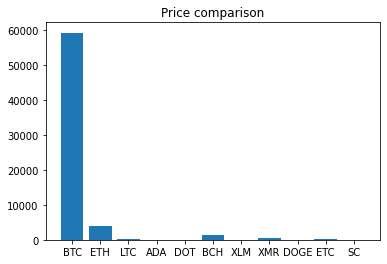

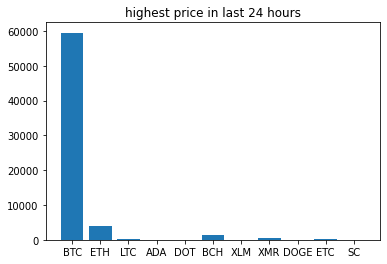

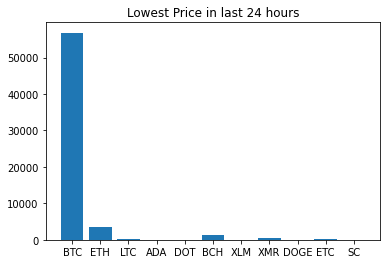

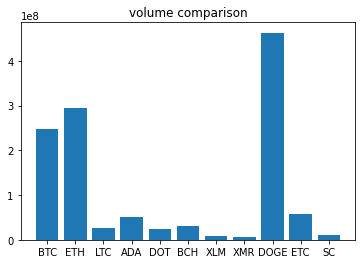

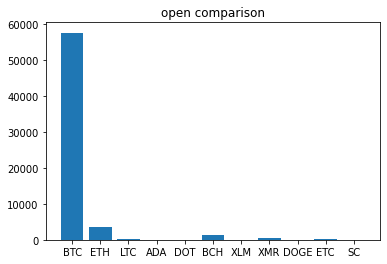

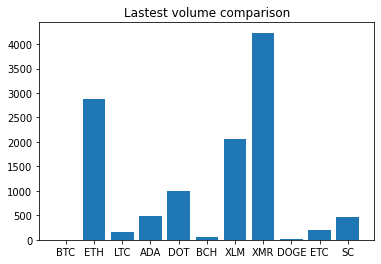

In [28]:
df = pd.read_csv('data_all.csv')

#create graph for price of coins
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df['PRICE'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Price comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df['HIGH24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))
plt.title("highest price in last 24 hours")
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Make a random dataset:
height = df['LOW24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Lowest Price in last 24 hours")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Make a random dataset:
height = df['VOLUME24HOURTO'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("volume comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

height = df['OPEN24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("open comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

height = df['LASTVOLUMETO'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Lastest volume comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Creating scatter plots and checking correlation

Dataset of BTC has been created
Dataset of ETH has been created
            time       high        low  ...   timestamp  Symbol         mid
0     1438905600    27.7900     0.7809  ...  2015-08-07     ETH    14.28545
1     1438992000     2.5810     0.5958  ...  2015-08-08     ETH     1.58840
2     1439078400     0.9581     0.6043  ...  2015-08-09     ETH     0.78120
3     1439164800     0.7628     0.5990  ...  2015-08-10     ETH     0.68090
4     1439251200     1.1650     0.6548  ...  2015-08-11     ETH     0.90990
...          ...        ...        ...  ...         ...     ...         ...
2097  1620086400  3531.0400  3185.0100  ...  2021-05-04     ETH  3358.02500
2098  1620172800  3549.0800  3208.2500  ...  2021-05-05     ETH  3378.66500
2099  1620259200  3607.9800  3381.4600  ...  2021-05-06     ETH  3494.72000
2100  1620345600  3592.4600  3360.6000  ...  2021-05-07     ETH  3476.53000
2101  1620432000  3849.5300  3454.8900  ...  2021-05-08     ETH  3652.21000

[2102 rows x 10 columns

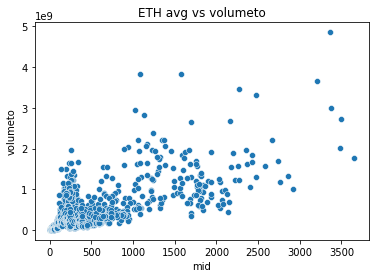

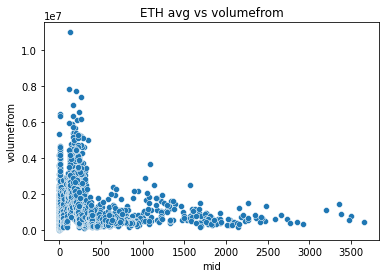

In [29]:
import requests
import json
import pandas as pd
import datetime
import csv
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
  
    return df

x = ['BTC','ETH']
for i in x:
  m = daily_price_historical(i,'USD')
  m['Symbol'] = i
  m.to_csv("./{0}_price.csv".format(i.replace("-","_")),index = False)

  print('Dataset of '+i+' has been created')

  # libraries
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ETH_price.csv')

x = ['ETH']
dfs = []
for m in x:
  filenames = '{}_price.csv'.replace('{}',m)
  df = pd.read_csv(filenames)
  #Drop all zeroes
  df = df[(df['high']!=0)]
  dfs.append(df)

dfs = pd.concat(dfs, ignore_index=True)

dfs = dfs.drop(columns=['conversionSymbol','conversionType'])
high = dfs.loc[:,'high'].to_numpy()
low_prices = dfs.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
dfs['mid'] = mid_prices
print(dfs)
# data



sns.scatterplot(data=dfs, x="mid", y="volumeto", legend=False, sizes=(20, 2000))

# show the graph
plt.title('ETH avg vs volumeto')
plt.show()

sns.scatterplot(data=dfs, x="mid", y="volumefrom", legend=False, sizes=(20, 2000))
plt.title('ETH avg vs volumefrom')
plt.show()

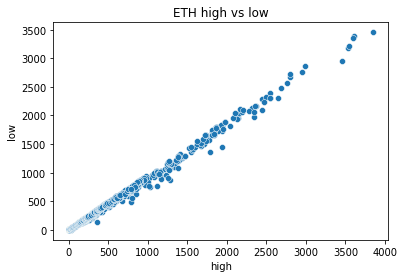

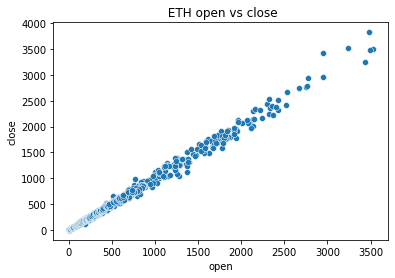

            time  high   low  open  volumefrom  volumeto  close   mid
time        1.00  0.52  0.53  0.53        0.21      0.58   0.53  0.53
high        0.52  1.00  1.00  1.00       -0.17      0.73   1.00  1.00
low         0.53  1.00  1.00  1.00       -0.18      0.70   1.00  1.00
open        0.53  1.00  1.00  1.00       -0.18      0.72   1.00  1.00
volumefrom  0.21 -0.17 -0.18 -0.18        1.00      0.34  -0.18 -0.18
volumeto    0.58  0.73  0.70  0.72        0.34      1.00   0.72  0.72
close       0.53  1.00  1.00  1.00       -0.18      0.72   1.00  1.00
mid         0.53  1.00  1.00  1.00       -0.18      0.72   1.00  1.00


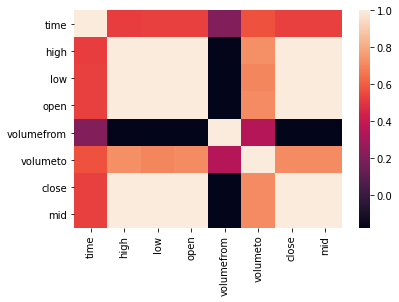

In [30]:
sns.scatterplot(data=dfs, x="high", y="low", legend=False, sizes=(20, 2000))
plt.title('ETH high vs low')
plt.show()

sns.scatterplot(data=dfs, x="open", y="close", legend=False, sizes=(20, 2000))
plt.title(' ETH open vs close')
plt.show()


from scipy import stats
cormat = dfs.corr()
print(round(cormat,2))
sns.heatmap(cormat)

Creating graphs to compate historical volumes and prices of bitcoins and ethereum

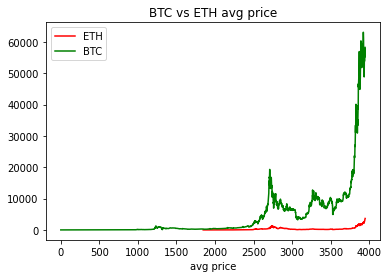

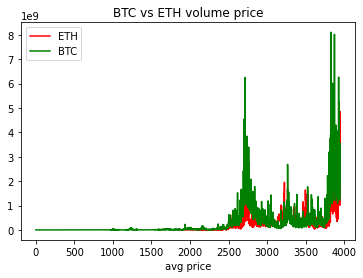

In [31]:
df1 = pd.read_csv('ETH_price.csv')
df2 =  pd.read_csv('BTC_price.csv')

dfs = []
for m in x:
  filenames = '{}_price.csv'.replace('{}',m)
  df = pd.read_csv(filenames)
  #Drop all zeroes
  df1 = df1[(df['high']!=0)]
  dfs.append(df)



high = df1.loc[:,'high'].to_numpy()
low_prices = df1.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
df1['mid'] = mid_prices

high = df2.loc[:,'high'].to_numpy()
low_prices = df2.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
df2['mid'] = mid_prices

plt.plot(df1['mid'], color = 'red',label = 'ETH')
plt.plot(df2['mid'],color = 'green',label = 'BTC')
plt.xlabel('avg price')
plt.title('BTC vs ETH avg price')
plt.legend()
plt.show()

plt.plot(df1['volumeto'], color = 'red',label = 'ETH')
plt.plot(df2['volumeto'],color = 'green',label = 'BTC')
plt.xlabel('avg price')
plt.title('BTC vs ETH volume price')
plt.legend()
plt.show()



            time         high          low  ...   timestamp  Symbol           mid
0     1279324800      0.04951      0.04951  ...  2010-07-17     BTC      0.049510
1     1279411200      0.08585      0.05941  ...  2010-07-18     BTC      0.072630
2     1279497600      0.09307      0.07723  ...  2010-07-19     BTC      0.085150
3     1279584000      0.08181      0.07426  ...  2010-07-20     BTC      0.078035
4     1279670400      0.07921      0.06634  ...  2010-07-21     BTC      0.072775
...          ...          ...          ...  ...         ...     ...           ...
3944  1620086400  57226.81000  53108.04000  ...  2021-05-04     BTC  55167.425000
3945  1620172800  57944.11000  52978.89000  ...  2021-05-05     BTC  55461.500000
3946  1620259200  58392.76000  55299.40000  ...  2021-05-06     BTC  56846.080000
3947  1620345600  58695.29000  55311.16000  ...  2021-05-07     BTC  57003.225000
3948  1620432000  59481.81000  56985.44000  ...  2021-05-08     BTC  58233.625000

[3949 rows x 10

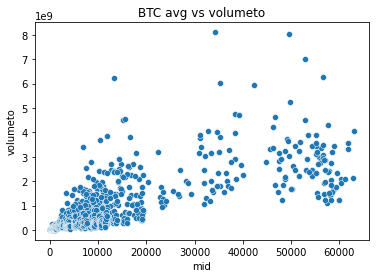

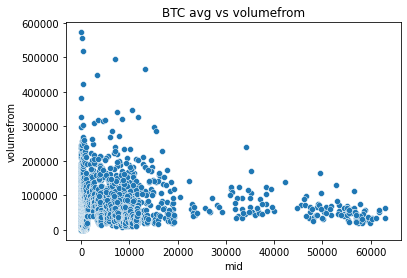

In [32]:
df = pd.read_csv('BTC_price.csv')

x = ['BTC']
dfs = []
for m in x:
  filenames = '{}_price.csv'.replace('{}',m)
  df = pd.read_csv(filenames)
  #Drop all zeroes
  df = df[(df['high']!=0)]
  dfs.append(df)

dfs = pd.concat(dfs, ignore_index=True)

dfs = dfs.drop(columns=['conversionSymbol','conversionType'])
high = dfs.loc[:,'high'].to_numpy()
low_prices = dfs.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
dfs['mid'] = mid_prices
print(dfs)
# data



sns.scatterplot(data=dfs, x="mid", y="volumeto", legend=False, sizes=(20, 2000))

# show the graph
plt.title('BTC avg vs volumeto')
plt.show()

sns.scatterplot(data=dfs, x="mid", y="volumefrom", legend=False, sizes=(20, 2000))
plt.title('BTC avg vs volumefrom')
plt.show()

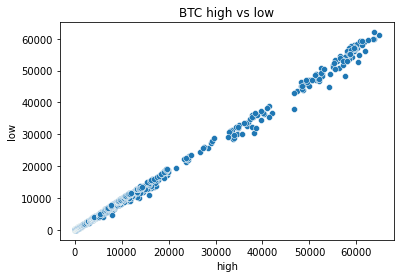

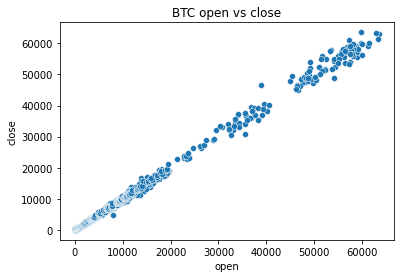

            time  high   low  open  volumefrom  volumeto  close   mid
time        1.00  0.61  0.61  0.61        0.20      0.51   0.61  0.61
high        0.61  1.00  1.00  1.00        0.10      0.82   1.00  1.00
low         0.61  1.00  1.00  1.00        0.08      0.80   1.00  1.00
open        0.61  1.00  1.00  1.00        0.09      0.81   1.00  1.00
volumefrom  0.20  0.10  0.08  0.09        1.00      0.38   0.09  0.09
volumeto    0.51  0.82  0.80  0.81        0.38      1.00   0.81  0.81
close       0.61  1.00  1.00  1.00        0.09      0.81   1.00  1.00
mid         0.61  1.00  1.00  1.00        0.09      0.81   1.00  1.00


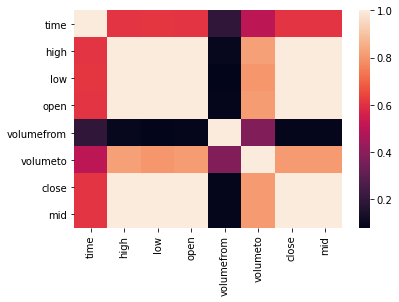

In [33]:
sns.scatterplot(data=dfs, x="high", y="low", legend=False, sizes=(20, 2000))
plt.title('BTC high vs low')
plt.show()

sns.scatterplot(data=dfs, x="open", y="close", legend=False, sizes=(20, 2000))
plt.title('BTC open vs close')
plt.show()


from scipy import stats
cormat = dfs.corr()
print(round(cormat,2))
sns.heatmap(cormat)